# **Regression**

- y = f(x)
- y: 모기 활동 지수
- x: 활동 지수에 영향을 주는 독립변수

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

데이터 전처리

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/mosquito_final_air_data.csv")

In [ ]:
#분석에 필요없는 데이터 drop
df= df.drop(['모기 활동 지수(수변부)','모기 발생 단계(수변부)','모기 발생 수준(수변부)','모기 발생 난이도(수변부)',
 '모기 활동 지수(주거지)','모기 발생 단계(주거지)','모기 발생 수준(주거지)','모기 발생 난이도(주거지)',
 '모기 활동 지수(공원)','모기 발생 단계(공원)','모기 발생 수준(공원)','모기 발생 난이도(공원)',
 '포집량','모기','기타','모기 발생 단계(서울시 평균)','모기 발생 수준(서울시 평균)',
 '모기 발생 난이도(서울시 평균)','지점','지점명','Unnamed: 0'],axis=1)

In [ ]:
#컬럼명 수정
df.rename(columns={
 '날짜':'date',
 '요일':'day',
 '평균 기온(℃)':'AT', #Average temperature
 '최저 기온(℃)':'LT', #Lowest temperature
 '최고 기온(℃)':'MT', #Maximum temperature
 '모기 활동 지수(서울시 평균)':'MAI', #Mosquito activity index
 '평균 풍속(m/s)':'AWS', #average wind speed
 '평균 전운량(1/10)':'AOE', #Average amount of electricity
 '평균 지면온도(°C)':'AGT', #average ground temperature
 '평균 5cm 지중온도(°C)':'5UT',#5cm average underground temperature
 '0.5m 지중온도(°C)':'0.5UT',#0.5 m underground temperature
 'Month':'Month',
 '일강수량(mm)':'DP', #daily precipitation
 '평균 상대습도(%)':'ARH', #Average relative humidity
 '평균 증기압(hPa)':'AVP',#average vapor pressure
 '평균 현지기압(hPa)':'MLAP', #mean local atmospheric pressure
 '평균 해면기압(hPa)':'ASSP', #average sea surface pressure
 '합계 일사량(MJ/m2)':'TSR', #total solar radiation
 '미세먼지(㎍/㎥)':'FD',#Fine dust
 '초미세먼지(㎍/㎥)':'UFD', #Ultra fine dust
 '이산화질소농도(ppm)':'NDC', #Nitrogen dioxide concentration
 '일산화탄소농도(ppm)':'CMC', #carbon monoxide concentration
 '아황산가스농도(ppm)':'SDC'#Sulfur dioxide concentration
 },inplace=True)


In [ ]:
sns.set_style('darkgrid')

In [ ]:
#기온의 값은 기상청에서 찾은 값으로 채움
df['LT'] = df['LT'].fillna(27.2)
df['MT'] = df['MT'].fillna(23.4)

#대기 데이터의 null값은 많지 않으므로 dropna
df = df.dropna()
df.isnull().sum()

,0
date,0
day,0
AT,0
LT,0
MT,0
MAI,0
AWS,0
AOE,0
AGT,0
5UT,0


In [ ]:
numerical_columns = ['AT', 'AWS', 'AOE', 'AGT', 'DP',
 'ARH', 'AVP', 'MLAP', 'TSR','FD', 'UFD','NDC','CMC','SDC']

모델링

In [ ]:
from sklearn.preprocessing import StandardScaler
#표준화
scaler = StandardScaler()
scale_columns = ['AT', 'LT', 'MT', 'AWS', 'AOE','AGT', '5UT', '0.5UT', 'Month', 'DP',
 'ARH', 'AVP', 'MLAP', 'ASSP','TSR','FD', 'UFD','NDC','CMC','SDC']
df[scale_columns] = scaler.fit_transform(df[scale_columns])

In [ ]:
from sklearn.model_selection import train_test_split
# split dataset into training & test
X = df[numerical_columns]
y = df['MAI']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['features'] = X_train.columns
vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif.round(1)

,features,VIF Factor
0,AT,8.8
1,AWS,1.7
2,AOE,2.6
3,AGT,16.2
4,DP,1.4
5,ARH,3.5
6,AVP,10.9
7,MLAP,3.8
8,TSR,4.2
9,FD,2.9


In [ ]:
from sklearn import linear_model
# fit regression model in training set
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)
# predict in test set
pred_test = lr.predict(X_test)

In [ ]:
coefs = pd.DataFrame(zip(df[numerical_columns].columns, lr.coef_), columns = ['feature', 'coefficients'])
coefs

,feature,coefficients
0,AT,38.318096
1,AWS,-12.872248
2,AOE,-29.454944
3,AGT,127.158408
4,DP,3.187390
5,ARH,-33.801564
6,AVP,2.550190
7,MLAP,-19.224088
8,TSR,-80.091963
9,FD,-16.924828


In [ ]:
coefs_new = coefs.reindex(coefs.coefficients.abs().sort_values(ascending=False).index)
coefs_new

,feature,coefficients
3,AGT,127.158408
8,TSR,-80.091963
0,AT,38.318096
5,ARH,-33.801564
13,SDC,31.821163
2,AOE,-29.454944
7,MLAP,-19.224088
9,FD,-16.924828
1,AWS,-12.872248
12,CMC,-12.490745


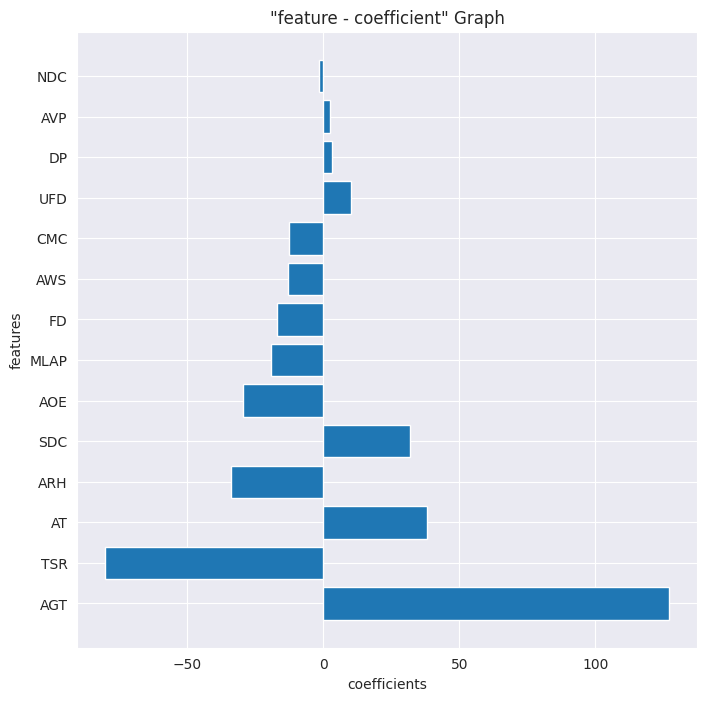

In [ ]:
plt.figure(figsize = (8, 8))
plt.barh(coefs_new['feature'], coefs_new['coefficients'])
plt.title('"feature - coefficient" Graph')
plt.xlabel('coefficients')
plt.ylabel('features')
plt.show()

In [ ]:
import statsmodels.api as sm
X_train2 = sm.add_constant(X_train)
model2 = sm.OLS(y_train, X_train2).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MAI   R-squared:                       0.373
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     84.95
Date:                Thu, 12 Feb 2026   Prob (F-statistic):          9.63e-191
Time:                        12:02:57   Log-Likelihood:                -13331.
No. Observations:                2012   AIC:                         2.669e+04
Df Residuals:                    1997   BIC:                         2.678e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        139.4104      4.087     34.110      0.000     131.395     147.426
AT            38.3181     12.137      3.157      0.002      14.515      62.121
AWS          -12.8722      5.206     -2.473      0.013     -23.081      -2.663
AOE          -29.4549      6.563     -4.488      0.000     -42.326     -16.584
AGT          127.1584     16.462      7.724      0.000      94.874     159.443
DP             3.1874      4.752      0.671      0.502      -6.131      12.506
ARH          -33.8016      7.736     -4.369      0.000     -48.974     -18.629
AVP            2.5502     13.483      0.189      0.850     -23.893      28.993
MLAP         -19.2241      7.873     -2.442      0.015     -34.665      -3.784
TSR          -80.0920      8.390     -9.546      0.000     -96.546     -63.638
FD           -16.9248      6.757     -2.505      0.012     -30.176      -3.673
UFD           10.1041      8.511      1.187      0.235      -6.587      26.795
NDC           -1.5607      8.073     -0.193      0.847     -17.393      14.271
CMC          -12.4907      8.589     -1.454      0.146     -29.335       4.353
SDC           31.8212      5.224      6.092      0.000      21.577      42.066
==============================================================================
Omnibus:                      534.856   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1347.419
Skew:                           1.427   Prob(JB):                    2.58e-293
Kurtosis:                       5.815   Cond. No.                         11.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
X_train2

,const,AT,AWS,AOE,AGT,DP,ARH,AVP,MLAP,TSR,FD,UFD,NDC,CMC,SDC
1012,1.0,0.666825,0.764312,0.576946,0.916304,-0.372229,0.851302,0.649872,-0.384220,0.710174,0.253701,0.541169,-1.352482,-0.335465,-1.327539
2296,1.0,-1.575507,-1.443776,0.642057,-1.445560,-0.123944,1.279445,-0.880461,1.225091,-1.708329,0.821811,1.071431,2.206844,3.625520,0.105606
1731,1.0,0.190329,-0.707746,-1.539178,0.362607,-0.372229,-0.533471,-0.318542,-0.234516,1.260977,0.497177,0.938866,0.993437,0.230390,1.538752
1092,1.0,1.003174,2.236370,1.553618,0.751926,-0.109339,1.700898,1.630241,-1.269965,-1.220435,-0.760780,-0.651921,-1.271588,-0.335465,-1.327539
1303,1.0,-1.267186,0.617106,-0.790396,-1.211969,-0.357624,-0.125398,-1.059797,0.925685,-0.096460,0.902969,2.131956,-0.786226,1.362100,1.538752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963,1.0,-0.762662,1.647547,0.576946,-0.640969,-0.335717,-1.329549,-0.976107,0.651228,0.550804,-0.354988,-0.519356,-0.948013,-0.335465,-1.327539
907,1.0,-1.276529,-1.002158,-0.009058,-1.376348,-0.372229,-1.135547,-1.107620,0.813407,-0.563385,0.578335,1.005149,1.802375,1.927955,-0.610967
1099,1.0,1.049890,0.028283,1.683841,0.873047,-0.211574,1.707587,1.713931,-0.933132,-0.861154,-1.044835,-1.182184,-0.705332,-0.335465,-1.327539
235,1.0,-0.220765,-0.118923,-0.334615,-0.372772,-0.372229,0.115432,-0.497878,0.014989,0.529834,1.308762,1.137714,1.074331,1.362100,0.105606


In [ ]:
### 예측 결과 시각화 (test set)
df = pd.DataFrame({'actual': y_test, 'prediction': pred_test})
df = df.sort_values(by='actual').reset_index(drop=True)
df.head()

,actual,prediction
0,0.0,54.274553
1,0.0,-114.321212
2,0.0,-61.287784
3,0.0,-55.791487
4,0.0,-20.755942


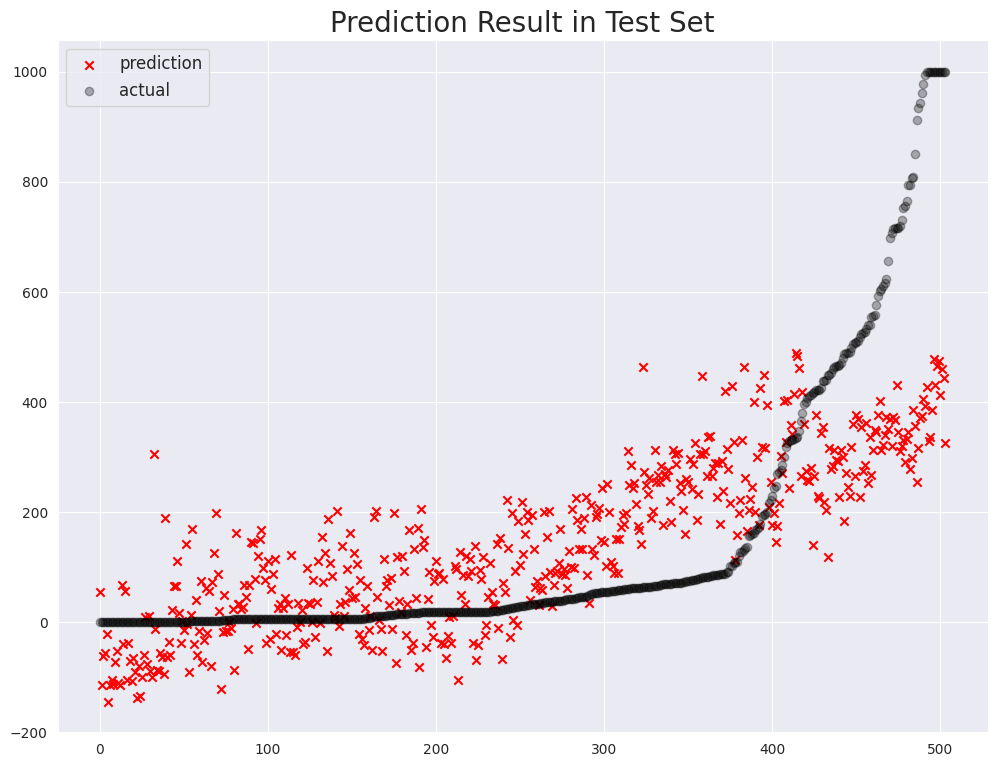

In [ ]:
plt.figure(figsize=(12, 9))
plt.scatter(df.index, df['prediction'], marker='x', color='r')
plt.scatter(df.index, df['actual'], alpha=0.3, marker='o', color='black')
plt.title("Prediction Result in Test Set", fontsize=20)
plt.legend(['prediction', 'actual'], fontsize=12)
plt.show()

In [ ]:
### R square
print(model.score(X_train, y_train)) # training set
print(model.score(X_test, y_test)) # test set

0.37324919321537475
0.45185494123987824


In [ ]:
# RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
# training set
pred_train = lr.predict(X_train)
print(sqrt(mean_squared_error(y_train, pred_train)))
# test set
print(sqrt(mean_squared_error(y_test, pred_test)))

182.51664626628906
184.59188925598048
